# <center style='color:goldenrod'>`Logistic Regression` using Scikit-Learn</center>

# 1. Import required libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

# 2. Load `rice` dataset

In [2]:
df = pd.read_csv('rice.csv')
df.head()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent,Class
0,15231,525.578979,229.749878,85.093788,0.928882,15617,0.572896,Cammeo
1,14656,494.311005,206.020065,91.730972,0.895405,15072,0.615436,Cammeo
2,14634,501.122009,214.106781,87.768288,0.912118,14954,0.693259,Cammeo
3,13176,458.342987,193.337387,87.448395,0.891861,13368,0.640669,Cammeo
4,14688,507.166992,211.743378,89.312454,0.906691,15262,0.646024,Cammeo


In [3]:
df.shape

(3810, 8)

In [4]:
df.Class.unique()

array(['Cammeo', 'Osmancik'], dtype=object)

In [5]:
df.Class.value_counts()

Osmancik    2180
Cammeo      1630
Name: Class, dtype: int64

# 3. Perform preprocessing

In [6]:
df.Class = df.Class.apply(lambda x: 1 if x=='Cammeo' else 2)
df.head()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent,Class
0,15231,525.578979,229.749878,85.093788,0.928882,15617,0.572896,1
1,14656,494.311005,206.020065,91.730972,0.895405,15072,0.615436,1
2,14634,501.122009,214.106781,87.768288,0.912118,14954,0.693259,1
3,13176,458.342987,193.337387,87.448395,0.891861,13368,0.640669,1
4,14688,507.166992,211.743378,89.312454,0.906691,15262,0.646024,1


# 4. Separate features and classes

In [7]:
X = df.iloc[:, :-1]
y = df.loc[:, 'Class']

# 5. Split the dataset

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, train_size=0.8, random_state=1)

In [9]:
len(X_train), len(X_test), len(y_train), len(y_test)

(3048, 762, 3048, 762)

# 6. Apply `Logistic Regression`

In [10]:
lr = LogisticRegression(max_iter=400, random_state=1)
lr.fit(X_train, y_train)

LogisticRegression(max_iter=400, random_state=1)

In [11]:
print('Accuracy on the train set:', round(lr.score(X_train, y_train), 4))
print('Accuracy on the test set:', round(lr.score(X_test, y_test), 4))

Accuracy on the train set: 0.9304
Accuracy on the test set: 0.9291


# 7. Plot `confusion_matrix`

In [12]:
y_pred = lr.predict(X_test)
cm = metrics.confusion_matrix(y_test, y_pred)
disp = metrics.ConfusionMatrixDisplay(cm, display_labels=lr.classes_)

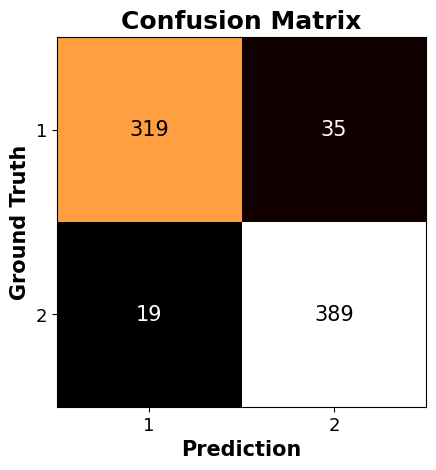

In [13]:
disp.plot(cmap='gist_heat', colorbar=False, text_kw={'size': 15})

plt.xlabel('Prediction', fontsize=15, fontweight='bold')
plt.ylabel('Ground Truth', fontsize=15, fontweight='bold')
plt.title('Confusion Matrix', fontsize=18, fontweight='bold')

plt.xticks(fontsize=13)
plt.yticks(fontsize=13);

In [14]:
y_test.value_counts()

2    408
1    354
Name: Class, dtype: int64

In [15]:
cat_labels = ['Cammeo', 'Osmancik']
y_pred = lr.predict(X_test)
cm = metrics.confusion_matrix(y_test, y_pred)
disp = metrics.ConfusionMatrixDisplay(cm, display_labels=cat_labels)

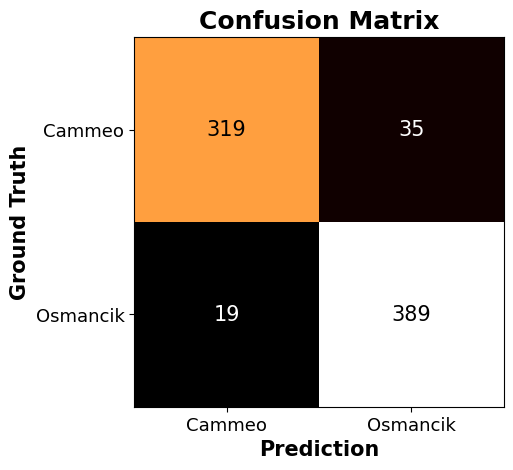

In [16]:
disp.plot(cmap='gist_heat', colorbar=False, text_kw={'size': 15})

plt.xlabel('Prediction', fontsize=15, fontweight='bold')
plt.ylabel('Ground Truth', fontsize=15, fontweight='bold')
plt.title('Confusion Matrix', fontsize=18, fontweight='bold')

plt.xticks(fontsize=13)
plt.yticks(fontsize=13);

In [17]:
print('Jaccard score:', round(metrics.jaccard_score(y_test, y_pred), 4))

Jaccard score: 0.8552


# 8. Print `classification_report`

In [18]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.94      0.90      0.92       354
           2       0.92      0.95      0.94       408

    accuracy                           0.93       762
   macro avg       0.93      0.93      0.93       762
weighted avg       0.93      0.93      0.93       762



# 9. Random prediction

In [19]:
df.describe()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent,Class
count,3810.000000,3810.000000,3810.000000,3810.000000,3810.000000,3810.000000,3810.000000,3810.000000
mean,12667.727559,454.239180,188.776222,86.313750,0.886871,12952.496850,0.661934,1.572178
std,1732.367706,35.597081,17.448679,5.729817,0.020818,1776.972042,0.077239,0.494828
min,7551.000000,359.100006,145.264465,59.532406,0.777233,7723.000000,0.497413,1.000000
25%,11370.500000,426.144752,174.353855,82.731695,0.872402,11626.250000,0.598862,1.000000
50%,12421.500000,448.852493,185.810059,86.434647,0.889050,12706.500000,0.645361,2.000000
75%,13950.000000,483.683746,203.550438,90.143677,0.902588,14284.000000,0.726562,2.000000
max,18913.000000,548.445984,239.010498,107.542450,0.948007,19099.000000,0.861050,2.000000


In [20]:
random_data = [[9000, 400.3456789, 200.64563746, 80.856456737, 0.897584, 12000, 0.674563]]
random_data = pd.DataFrame(random_data, columns=X.columns)
lr.predict(random_data) # Cammeo

array([1])